# Импорт

In [14]:
import matplotlib.pyplot as plt
import matplotlib.image
import numpy as np
import PIL.Image as Image
from tqdm import tqdm

import torch
from torch.utils.data import DataLoader
import torchvision.transforms as transforms

In [15]:
import os

# Загрузка данных

# Подготовка данных

In [16]:
initial_tags = np.asarray([
    [0,0,0],            # фон
    [0,254,254],        # правая рука
    [51, 169, 220],     # левая рука
    [85,51,0],          # шея
    [254, 0,0],         # волосы
    [0,0,254],          # лицо
    [254, 85, 0],       # торс
    [0, 85, 85],        # штаны
    [0, 128, 0],        # юбка
    [85, 254, 169],     # левая нога
    [169, 254, 85],     # правая нога
    [0, 119, 220],      # верхняя одежда
    [0, 0, 85],         # верх нестандартного вида: платья, боди етс
    [254, 254, 0],      # левая стопа
    [254, 169, 0],      # правая стопа
    # [],вв
    # [],
    # [],
])

In [17]:
tag_labels = np.array( ['Фон',
                        'Правая рука',
                       'Левая рука',
                       'Шея',
                       'Волосы',
                       'Лицо',
                       'Торс',
                       'Штаны',
                       'Юбка',
                       'Левая нога',
                       'Правая нога',
                       'Верхняя одежда',
                       'Платье',
                       'Левая стопа',
                       'Правая стопа',
                        ])

 ## Прямое преобразование

In [18]:
def get_tag(pixel, num_tags, tags):
    """
    получаем пиксель, выясняем, какому классу принадлежит, возвращаем принадлежность классу
    """
    for i in range(num_tags):
        if pixel.tolist() == tags[i].tolist():
            return i

In [19]:
def rgb_to_tags(image, tags):
    """
    Функция, принимающая трехканальное rgb-изображение из pillow
    и выдающая многоканальное а-ля one-hot изображение.
    Метки должны быть массивом чисел-значений пикселей, пажожьда.
    """
    np_image = np.asarray(image)
    num_tags = len(tags)
    image_shape = np_image.shape

    height, width = image_shape[0], image_shape[1]
    new_image = np.zeros([height, width, 15])

    for i in range(height):
        for j in range(width-1):
            new_image[i,j, get_tag(np_image[i,j], num_tags, tags)] = 1

    return new_image

In [20]:
def save_to_file(filepath, array):
    Image.fromarray(np.uint8(array*255), 'L').save(filepath)

In [21]:
def export_from_file(filepath):
    return np.asarray((Image.open(filepath).convert('L'))) / 255

In [22]:
def save_multichannel(filepath, num_channel, array):
    for i in range(num_channel):
        save_to_file(filepath + f'{i}.png', array[:,:,i])

In [23]:
def create_image_directory(dirpath):
    os.mkdir(dirpath)

## Вывод расканаливания, сохранение данных

In [24]:
folder = "C:\\Users\\DenisovDmitrii\\OneDrive - ITMO UNIVERSITY\\peopleDetector\\segmentation\\bigData\\image-parse-v3\\"

In [25]:
save_folder = "C:\\Users\\DenisovDmitrii\\OneDrive - ITMO UNIVERSITY\\peopleDetector\\segmentation\\bigData\\image-parse-v3-multichannel\\"

In [26]:
list_files = os.listdir(folder)
for images in tqdm(list_files):
    if images.endswith(".png"):
        #print(images)
        img = Image.open(folder + images).convert('RGB')
        #print(' --- segmenting the image...')

        seg = rgb_to_tags(img, initial_tags)

        image_name = images.split('.')[0]

        dirname = save_folder + image_name + '\\'

        #print(' --- creating the directory...')

        create_image_directory(dirname)

        #print(' --- saving images...')

        save_multichannel(dirname + image_name, 15, seg)
        #print(' --- done.')


100%|██████████| 11647/11647 [2:17:32<00:00,  1.41it/s] 


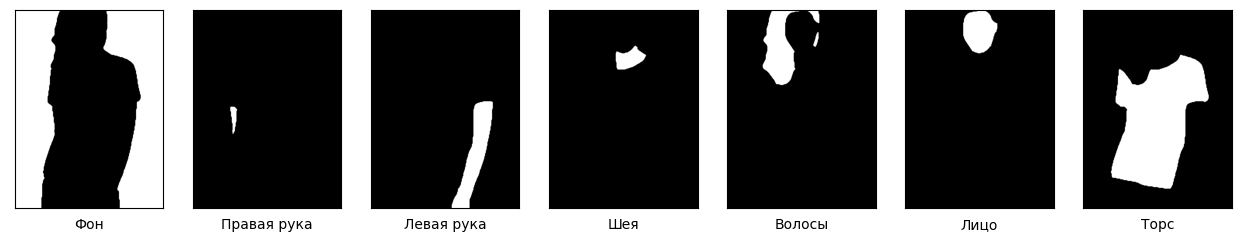

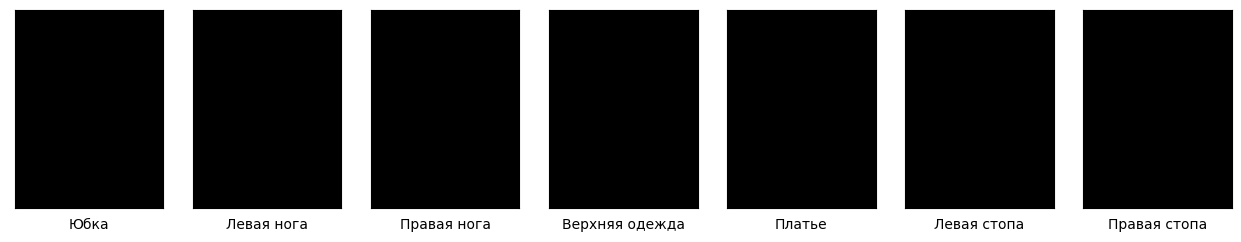

In [47]:
# ЧЕРНЫЙ - 0, БЕЛЫЙ - 1.
plt.figure(figsize = (18,6))
for i in range(1,len(initial_tags)//2+1):
    plt.subplot(1,8,i)
    plt.xlabel(tag_labels[i-1])
    plt.xticks([])
    plt.yticks([])
    plt.imshow(seg[:,:,i-1],cmap = 'gray')

plt.figure(figsize = (18,6))
ctr = 0
for i in range(8,len(initial_tags)):
    ctr+=1
    plt.subplot(1,8,ctr)
    plt.xlabel(tag_labels[i])
    plt.xticks([])
    plt.yticks([])
    plt.imshow(seg[:,:,i],cmap = 'gray')